In [209]:
with open('names.txt') as f:
    words = f.read().splitlines()

In [210]:
print(words[:3])

['emma', 'olivia', 'ava']


In [211]:
vocab = sorted(list(set(''.join(words))))
print(vocab)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [212]:
stoi = {s: i+1 for i, s in enumerate(vocab)}

In [213]:
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [214]:
stoi['.'] = 0

In [215]:
itos = {i+1: s for i, s in enumerate(vocab)}

In [216]:
itos[0] = '.'

In [217]:
data = []
for word in words:
    word = '.' + word + '.'
    for c1, c2 in zip(word, word[1:]):
        
        data.append((c1, c2))

In [218]:
print(data[:5])

[('.', 'e'), ('e', 'm'), ('m', 'm'), ('m', 'a'), ('a', '.')]


In [219]:
freq = {}
for k in data:
    freq[k] = freq.get(k, 0) + 1
print(freq)

{('.', 'e'): 1531, ('e', 'm'): 769, ('m', 'm'): 168, ('m', 'a'): 2590, ('a', '.'): 6640, ('.', 'o'): 394, ('o', 'l'): 619, ('l', 'i'): 2480, ('i', 'v'): 269, ('v', 'i'): 911, ('i', 'a'): 2445, ('.', 'a'): 4410, ('a', 'v'): 834, ('v', 'a'): 642, ('.', 'i'): 591, ('i', 's'): 1316, ('s', 'a'): 1201, ('a', 'b'): 541, ('b', 'e'): 655, ('e', 'l'): 3248, ('l', 'l'): 1345, ('l', 'a'): 2623, ('.', 's'): 2055, ('s', 'o'): 531, ('o', 'p'): 95, ('p', 'h'): 204, ('h', 'i'): 729, ('.', 'c'): 1542, ('c', 'h'): 664, ('h', 'a'): 2244, ('a', 'r'): 3264, ('r', 'l'): 413, ('l', 'o'): 692, ('o', 't'): 118, ('t', 't'): 374, ('t', 'e'): 716, ('e', '.'): 3983, ('.', 'm'): 2538, ('m', 'i'): 1256, ('a', 'm'): 1634, ('m', 'e'): 818, ('.', 'h'): 874, ('r', 'p'): 14, ('p', 'e'): 197, ('e', 'r'): 1958, ('r', '.'): 1377, ('e', 'v'): 463, ('v', 'e'): 568, ('l', 'y'): 1588, ('y', 'n'): 1826, ('n', '.'): 6763, ('b', 'i'): 217, ('i', 'g'): 428, ('g', 'a'): 330, ('a', 'i'): 1650, ('i', 'l'): 1345, ('l', '.'): 1314, ('y',

In [220]:
freqi = {}
for k in freq.keys():
    freqi[(stoi[k[0]], stoi[k[1]])] = freq[k]
print(freqi)

{(0, 5): 1531, (5, 13): 769, (13, 13): 168, (13, 1): 2590, (1, 0): 6640, (0, 15): 394, (15, 12): 619, (12, 9): 2480, (9, 22): 269, (22, 9): 911, (9, 1): 2445, (0, 1): 4410, (1, 22): 834, (22, 1): 642, (0, 9): 591, (9, 19): 1316, (19, 1): 1201, (1, 2): 541, (2, 5): 655, (5, 12): 3248, (12, 12): 1345, (12, 1): 2623, (0, 19): 2055, (19, 15): 531, (15, 16): 95, (16, 8): 204, (8, 9): 729, (0, 3): 1542, (3, 8): 664, (8, 1): 2244, (1, 18): 3264, (18, 12): 413, (12, 15): 692, (15, 20): 118, (20, 20): 374, (20, 5): 716, (5, 0): 3983, (0, 13): 2538, (13, 9): 1256, (1, 13): 1634, (13, 5): 818, (0, 8): 874, (18, 16): 14, (16, 5): 197, (5, 18): 1958, (18, 0): 1377, (5, 22): 463, (22, 5): 568, (12, 25): 1588, (25, 14): 1826, (14, 0): 6763, (2, 9): 217, (9, 7): 428, (7, 1): 330, (1, 9): 1650, (9, 12): 1345, (12, 0): 1314, (25, 0): 2007, (9, 26): 277, (26, 1): 860, (5, 20): 580, (20, 8): 647, (8, 0): 2409, (18, 25): 773, (15, 6): 34, (6, 9): 160, (3, 1): 815, (18, 9): 3033, (19, 3): 60, (12, 5): 2921,

In [221]:
import torch

In [222]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [223]:
for k in data:
    ch1 = k[0]
    ch2 = k[1]
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

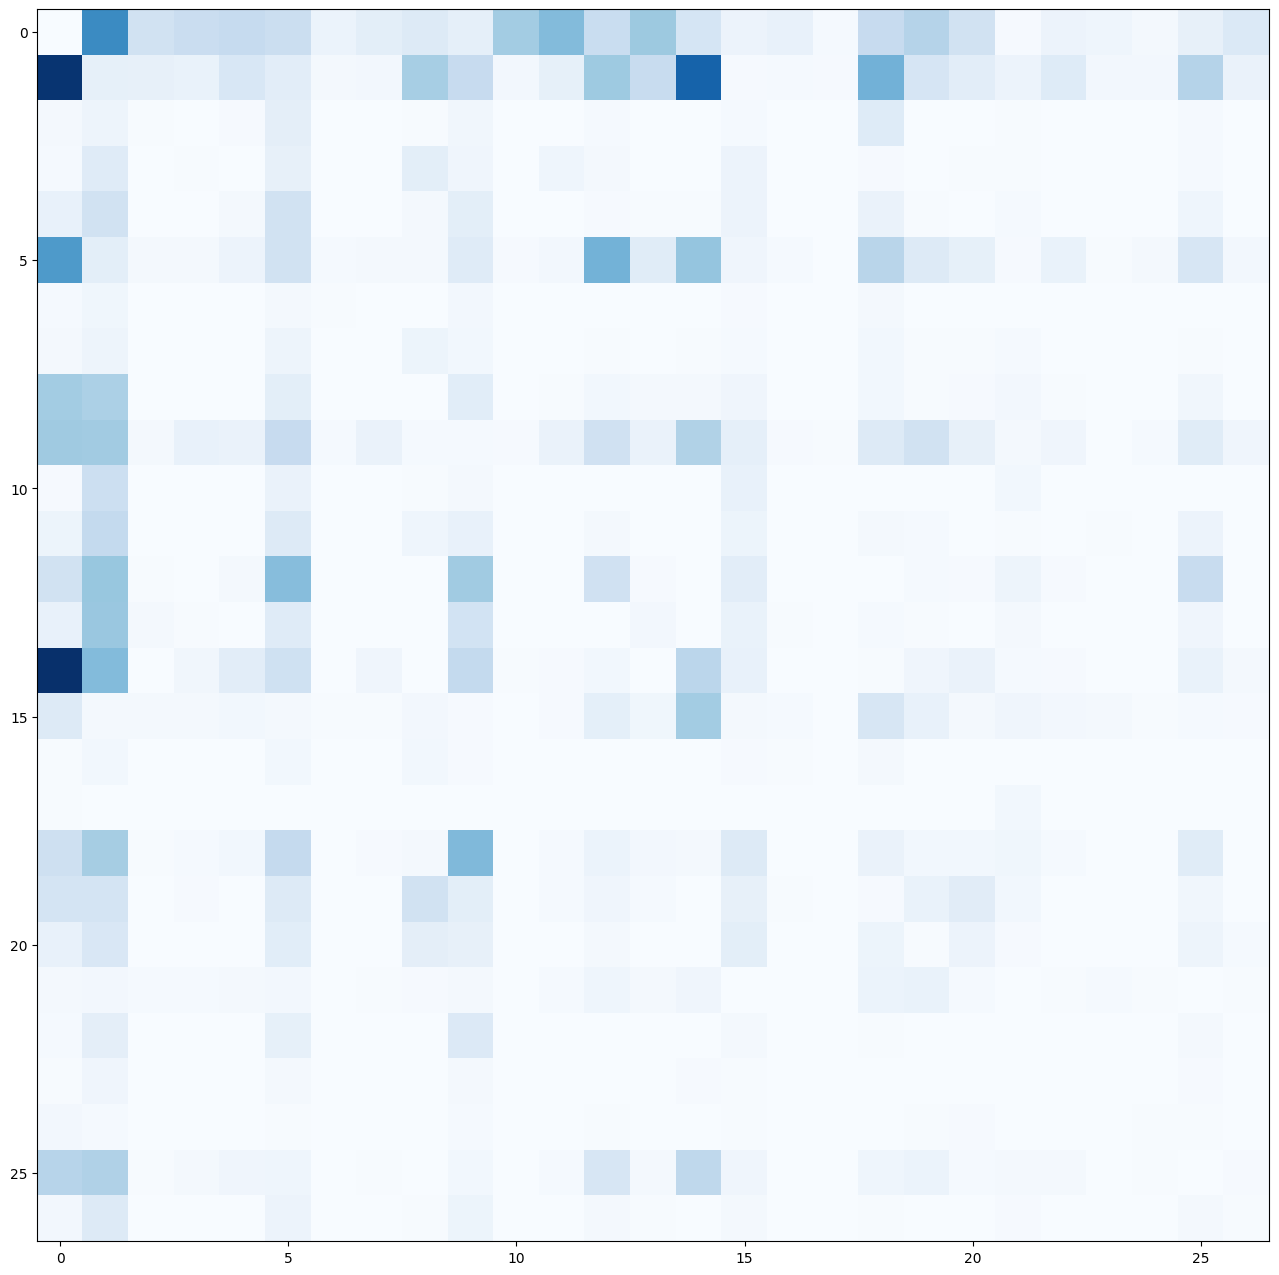

In [224]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

In [225]:
N += 1

In [226]:
prob = N / N.sum(1, keepdim=True)
print(prob[0])

tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
        1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
        4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
        5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
        4.2109e-03, 1.6719e-02, 2.9008e-02])


In [227]:
g = torch.Generator().manual_seed(2147483647)
for _ in range(5):
    r = torch.rand(27, generator=g)
    r /= r.sum()
    out = []
    while True:
        ix = torch.multinomial(r, num_samples=1, generator=g).item()
        out.append(itos[ix])
        
        if ix == 0:
            break
    print(''.join(out))
print("-----")
g = torch.Generator().manual_seed(2147483647)
for _ in range(5):
    out = []
    ix = 0
    while True:
        P = prob[ix]
        ix = torch.multinomial(P, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
      
        if ix == 0:
            break
    print(''.join(out))

fjiirltolcmgsfgqgvvglgnpaxvxmilmvlajfjbyailrwimtlvsnjyicvyvaftlcffvmumtryfoltmmjrpfftslwjqrjagq.
ijwyfvt.
packcz.
y.
.
-----
junide.
janasah.
p.
cony.
a.


In [228]:
nll = 0
count = 0
for word in words:
    word = '.' + word + '.'
    for ch1, ch2 in zip(word, word[1:]):
        count += 1
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        p = prob[ix1, ix2]
        nll += -torch.log(p)
nll /= count
print(nll)

tensor(2.4544)


In [229]:
import torch.nn.functional as F

In [230]:
xs, ys = [], []
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

num = xs.nelement()
print(num)

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

228146


In [231]:
for i in range(300):
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    prob = counts / counts.sum(1, keepdim=True)
    loss = - prob[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean()
    print(loss.item())

    W.grad = None
    loss.backward()
    W.data += -50 * W.grad


3.7686190605163574
3.378786325454712
3.1610782146453857
3.027181386947632
2.9344804286956787
2.8672285079956055
2.816652774810791
2.7771458625793457
2.745253562927246
2.7188308238983154
2.696505546569824
2.677372694015503
2.6608054637908936
2.6463515758514404
2.6336653232574463
2.622471570968628
2.6125476360321045
2.6037065982818604
2.595794439315796
2.5886807441711426
2.5822560787200928
2.5764293670654297
2.5711233615875244
2.566272735595703
2.5618226528167725
2.5577261447906494
2.5539441108703613
2.550442695617676
2.547192335128784
2.5441696643829346
2.5413522720336914
2.538721799850464
2.536261796951294
2.5339581966400146
2.5317976474761963
2.5297679901123047
2.527860164642334
2.526063919067383
2.5243704319000244
2.522773027420044
2.52126407623291
2.519836664199829
2.5184857845306396
2.5172054767608643
2.515990972518921
2.5148372650146484
2.5137407779693604
2.51269793510437
2.511705160140991
2.5107581615448
2.509854793548584
2.5089921951293945
2.5081686973571777
2.507380485534668
2.

In [232]:
g = torch.Generator().manual_seed(2147483647)
for _ in range(5):
    out = []
    ix = 0
    while True:

        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        P = counts / counts.sum(1, keepdims=True)
        ix = torch.multinomial(P, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
prelay.
a.
nn.
